In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from joblib import Parallel, delayed

### Trayectoria de $\nu(t)$

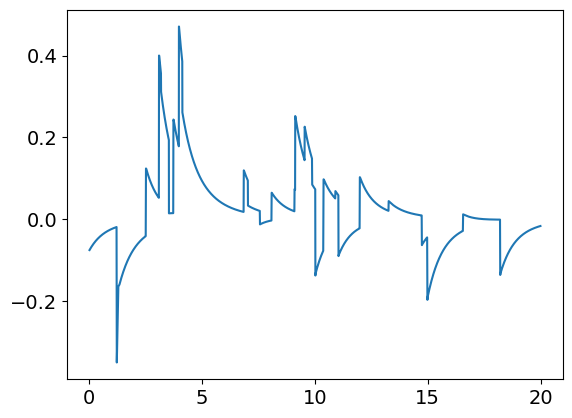

In [6]:
def g(x):
    return min(1*np.exp(5*x.sum()), 10**7)
def gen_trj(seed=0):
    np.random.seed(seed)
    t = 0.0
    T = 10000
    x = np.array([0.0,0.0,0.0])
    tau = np.array([1.0,0.5,2.0])
    h = np.array([0.5,0.6,0.1])
    ts, zs, ls = [], [], []
    while t < T:
        dt = min(0.1,(1.0/g(x))/100)
        x = x*np.exp(-dt/tau)
        r = np.random.normal() * 0.1
        if np.random.random() <= g(x)*dt:
            x += h * r
        ts.append(t)
        zs.append(x.sum())
        ls.append(g(x))
        t += dt
    return np.array(ts), np.array(zs), np.array(ls)
ts, zs, ls = gen_trj(10)
plt.rcParams["font.size"] = 14
t_ini = 1120; t_window = 20
loc=np.logical_and(t_ini < ts, ts < t_ini+t_window)
plt.plot(ts[loc]-t_ini,zs[loc])
#plt.savefig('trajectory_tension.pdf')

### Trayectoria de $\lambda(t)$

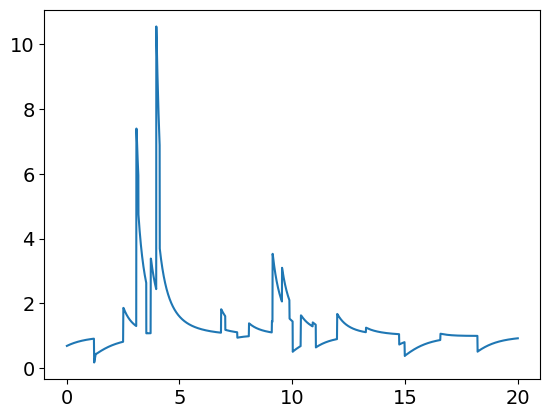

In [7]:
plt.plot(ts[loc]-t_ini,ls[loc])

### Ley de Zipf (distribución de intensidad)

In [8]:
def g(x):
    return min(1*np.exp(5*x.sum()), 10**7)
@njit
def positionInBin(x,bins):
    for i in range(len(bins)-1):
        if bins[i] <= x < bins[i+1]:
            return i
    return -1
@njit
def gen(seed=0):
    np.random.seed(seed)
    N_bin = 60
    hist = np.zeros(N_bin-1)
    bins_hist = 0.0001*2.0**np.arange(0,N_bin,1) # Logarithmic bins

    t = 0.0
    T = 50000
    x = np.array([0.0,0.0,0.0])
    tau = np.array([1.0,0.5,2.0])
    h = np.array([0.5,0.6,0.1])

    while t < T:
        dt = min(0.1,(1.0/g(x))/100)
        x = x*np.exp(-dt/tau)
        r = np.random.normal() * 0.1
        if np.random.random() <= g(x)*dt:
            x += h * r
        pos = positionInBin(g(x),bins_hist)
        if pos >= 0:
            hist[pos] += dt
        t += dt
    return bins_hist, hist

# Parallel computation and reduction
n_jobs=8
result = Parallel(n_jobs=n_jobs)([delayed(gen)(n+11) for n in range(n_jobs)])
hist = np.array(result)[:,1].sum(axis=0)
bins_hist = result[0][0]
hist /= hist.sum()

bins_width = np.array([bins_hist[i+1]-bins_hist[i] for i in range(len(bins_hist)-1)])
x = np.array([(bins_hist[i+1]+bins_hist[i])/2 for i in range(len(bins_hist)-1)])
PDF = hist/bins_width
plt.rcParams["font.size"] = 14
plt.xscale('log');plt.yscale('log')
x_min = 0.01; x_max = 0.8*10**7
plt.xlim(x_min,x_max)
plt.plot(x,PDF,'o',label='Numerical')
x = np.linspace(x_min,x_max,10)
plt.plot(x,x**(-2.00)/200,label='Expon=-(1+1)')
plt.legend(loc='lower left')
#plt.savefig('IntensityPDF.pdf')




TypingError: [1mFailed in nopython mode pipeline (step: nopython frontend)
[1mUntyped global name 'g':[0m [1m[1mCannot determine Numba type of <class 'function'>[0m
[1m
File "..\..\..\..\..\..\AppData\Local\Temp\ipykernel_7696\2885695501.py", line 23:[0m
[1m<source missing, REPL/exec in use?>[0m
[0m[0m